In [2]:
import os
import pandas as pd
from pandas import DataFrame
from pandas import concat
import numpy as np
from numpy import concatenate
import keras
import tensorflow as tf
import plotly
import plotly.graph_objects as go
import plotly.express as px
import kaleido ##pip install -U kaleido #to save a plotly fig
import sys 
import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
df1 = pd.read_csv('Stable_Data_CSV.csv')
df2 = pd.read_csv('12w_features.csv')
df_stable = df2[df2.set_index(['participant_id']).index.isin(df1.set_index(['participant_id']).index)]

In [4]:
df_stable_US = df_stable.loc[(df_stable['arm'] == 1)]
df_stable_WN = df_stable.loc[(df_stable['arm'] == 2)]
print(len(df_stable_US))
print(len(df_stable_WN))

31
30


In [5]:
df_stable_US.columns

Index(['participant_id', 'arm', 'c_3', 'sl_1', 'sl_2', 'a_2', 'r_1', 'q_1',
       'e_1', 'tfi_total', 'c_3.1', 'sl_1.1', 'sl_2.1', 'a_2.1', 'r_1.1',
       'q_1.1', 'e_1.1', 'tfi_total.1', 'c_3.2', 'sl_1.2', 'sl_2.2', 'a_2.2',
       'r_1.2', 'q_1.2', 'e_1.2', 'tfi_total.2', 'c_3.3', 'sl_1.3', 'sl_2.3',
       'a_2.3', 'r_1.3', 'q_1.3', 'e_1.3', 'tfi_total.3'],
      dtype='object')

In [48]:
df_stable_US=(df_stable_US[['c_3','sl_1','a_2','q_1','tfi_total','c_3.1','sl_1.1','a_2.1','q_1.1','tfi_total.1','c_3.2','sl_1.2','a_2.2','q_1.2','tfi_total.2','tfi_total.3']])
df_stable_WN=(df_stable_WN[['sl_2','r_1','e_1','tfi_total','sl_2.1','r_1.1','e_1.1','tfi_total.1','sl_2.2','r_1.2','e_1.2','tfi_total.2','tfi_total.3']])
"""
x_test_new_df= pd.DataFrame(columns=['c_3', 'sl_1', 'sl_2', 'a_2', 'r_1', 'q_1',
       'e_1', 'tfi_total', 'c_3.1', 'sl_1.1', 'sl_2.1', 'a_2.1', 'r_1.1',
       'q_1.1', 'e_1.1', 'tfi_total.1', 'c_3.2', 'sl_1.2', 'sl_2.2', 'a_2.2',
       'r_1.2', 'q_1.2', 'e_1.2', 'tfi_total.2'])
"""
x_test_new_df=pd.read_csv('new_test_data_12w_3ts.csv')

In [49]:
x_test_new_df

,c_3,sl_1,sl_2,a_2,r_1,q_1,e_1,tfi_total,c_3.1,sl_1.1,...,e_1.1,tfi_total.1,c_3.2,sl_1.2,sl_2.2,a_2.2,r_1.2,q_1.2,e_1.2,tfi_total.2
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,0.0,6.0,...,0.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0
1,6.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,0.0,0.0,...,0.0,78.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,89.0


In [7]:
df_stable_US

,c_3,sl_1,a_2,q_1,tfi_total,c_3.1,sl_1.1,a_2.1,q_1.1,tfi_total.1,c_3.2,sl_1.2,a_2.2,q_1.2,tfi_total.2,tfi_total.3
2,5.0,7.0,7.0,7.0,76.0,8.0,8.0,4.0,9.0,78.4,8.0,8.0,8.0,8.0,80.8,70.4
3,3.0,2.0,3.0,10.0,54.0,3.0,2.0,6.0,8.0,58.8,5.0,1.0,2.0,10.0,50.0,58.4
4,7.0,5.0,6.0,7.0,66.0,7.0,2.0,5.0,5.0,55.2,2.0,0.0,1.0,1.0,14.4,5.2
5,4.0,9.0,4.0,5.0,64.4,6.0,9.0,5.0,6.0,66.4,6.0,9.0,5.0,6.0,68.0,72.0
6,3.0,7.0,6.0,2.0,56.0,8.0,1.0,6.0,3.0,54.4,2.0,4.0,3.0,2.0,31.6,32.0
7,2.0,7.0,2.0,0.0,44.8,3.0,7.0,4.0,2.0,46.4,3.0,5.0,4.0,3.0,42.0,24.0
9,3.0,8.0,6.0,3.0,59.2,5.0,8.0,5.0,3.0,60.0,2.0,8.0,2.0,0.0,47.2,40.8
10,7.0,0.0,8.0,8.0,63.2,2.0,0.0,8.0,7.0,51.6,5.0,0.0,7.0,7.0,52.8,32.8
12,6.0,0.0,0.0,3.0,45.6,6.0,1.0,3.0,4.0,48.8,1.0,0.0,1.0,1.0,26.0,64.0
15,6.0,3.0,8.0,4.0,56.0,4.0,1.0,7.0,6.0,51.6,1.0,0.0,3.0,0.0,15.2,10.0


In [8]:
US_checkpoint_path = "model_checkpoints/12w_3ts/US/cp.ckpt"
WN_checkpoint_path = "model_checkpoints/12w_3ts/WN/cp.ckpt"
lr=0.001
n_epochs=30
n_batch_size=10
n_timesteps=3
n_features_US=5
n_features_WN=4

def data_prep(df,n_features):
    sc_x=StandardScaler()
    sc_y=StandardScaler()
    ## Separate dependent and independent features 
    X=df.drop(['tfi_total.3'],axis=1)
    y = df[['tfi_total.3']]
    #Train Test Split
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
    
    
    #scale x
    x_scaler=sc_x.fit(x_train)
    x_train=x_scaler.transform(x_train)
    x_test=x_scaler.transform(x_test)
    #scale y
    y_scaler=sc_y.fit(y_train)
    y_train=y_scaler.transform(y_train)
    y_test=y_scaler.transform(y_test)
    # Reshape input to be 3D for LSTM[samples, timesteps, features]
    x_train = x_train.reshape((x_train.shape[0],n_timesteps,n_features))
    x_test = x_test.reshape((x_test.shape[0],n_timesteps,n_features))
    print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)
    return x_train, x_test, y_train, y_test,x_scaler,y_scaler

def create_lstm_model(input_shape):
    tf.keras.backend.clear_session
    #input_shape=input_shape
    model = tf.keras.Sequential([
      tf.keras.layers.LSTM(50, activation='relu',input_shape=input_shape),
      tf.keras.layers.Dropout(0.2), # 20% of Neuron will get deactivated during training
      tf.keras.layers.Dense(1,activation = 'linear')                      
    ])             

    model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=lr))
    return model

def train_model(df,n_features,ck_path):
    x_train, x_test, y_train, y_test,x_scaler,y_scaler= data_prep(df,n_features)
    input_shape=(n_timesteps,n_features)
    model = create_lstm_model(input_shape)  # Create a basic model instance
    model.summary() # Display the model's architecture
    # Create a callback that saves the model's weights #save_best_only=True  (to save model)
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ck_path, save_weights_only=True,verbose=1)
    # Train the model
    history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=n_batch_size, validation_data=(x_test, y_test),callbacks=[cp_callback], verbose=1, shuffle=False)
    return history,x_scaler,y_scaler

#train lstm_model for US data and WN data seperately
US_history,US_x_scaler,US_y_scaler=train_model(df_stable_US,n_features_US,US_checkpoint_path)
WN_history,WN_x_scaler,WN_y_scaler=train_model(df_stable_WN,n_features_WN,WN_checkpoint_path)

(24, 3, 5) (24, 1) (7, 3, 5) (7, 1)
Metal device set to: Apple M1


2022-05-14 15:23:32.767175: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-14 15:23:32.767384: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                11200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 11,251
Trainable params: 11,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30


2022-05-14 15:23:33.076568: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-14 15:23:33.531441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - ETA: 0s - loss: 0.8349
Epoch 1: saving model to model_checkpoints/12w_3ts/US/cp.ckpt
3/3 [==============================] - 2s 252ms/step - loss: 0.8349 - val_loss: 0.9062
Epoch 2/30
1/3 [=========>....................] - ETA: 0s - loss: 0.8497

2022-05-14 15:23:34.917754: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 2: saving model to model_checkpoints/12w_3ts/US/cp.ckpt
3/3 [==============================] - 0s 35ms/step - loss: 0.8177 - val_loss: 0.8787
Epoch 3/30
1/3 [=========>....................] - ETA: 0s - loss: 0.8365
Epoch 3: saving model to model_checkpoints/12w_3ts/US/cp.ckpt
3/3 [==============================] - 0s 36ms/step - loss: 0.8014 - val_loss: 0.8504
Epoch 4/30
1/3 [=========>....................] - ETA: 0s - loss: 0.8232
Epoch 4: saving model to model_checkpoints/12w_3ts/US/cp.ckpt
3/3 [==============================] - 0s 35ms/step - loss: 0.7849 - val_loss: 0.8211
Epoch 5/30
1/3 [=========>....................] - ETA: 0s - loss: 0.8095
Epoch 5: saving model to model_checkpoints/12w_3ts/US/cp.ckpt
3/3 [==============================] - 0s 34ms/step - loss: 0.7679 - val_loss: 0.7909
Epoch 6/30
1/3 [=========>....................] - ETA: 0s - loss: 0.7956
Epoch 6: saving model to model_checkpoints/12w_3ts/US/cp.ckpt
3/3 [==============================] - 0s 36ms/step -

2022-05-14 15:23:38.063746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - ETA: 0s - loss: 0.8104
Epoch 1: saving model to model_checkpoints/12w_3ts/WN/cp.ckpt
3/3 [==============================] - 1s 186ms/step - loss: 0.8104 - val_loss: 0.5358
Epoch 2/30
1/3 [=========>....................] - ETA: 0s - loss: 0.8242

2022-05-14 15:23:38.611295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 2: saving model to model_checkpoints/12w_3ts/WN/cp.ckpt
3/3 [==============================] - 0s 33ms/step - loss: 0.7768 - val_loss: 0.5241
Epoch 3/30
1/3 [=========>....................] - ETA: 0s - loss: 0.7888
Epoch 3: saving model to model_checkpoints/12w_3ts/WN/cp.ckpt
3/3 [==============================] - 0s 34ms/step - loss: 0.7439 - val_loss: 0.5120
Epoch 4/30
1/3 [=========>....................] - ETA: 0s - loss: 0.7533
Epoch 4: saving model to model_checkpoints/12w_3ts/WN/cp.ckpt
3/3 [==============================] - 0s 32ms/step - loss: 0.7115 - val_loss: 0.5006
Epoch 5/30
1/3 [=========>....................] - ETA: 0s - loss: 0.7244
Epoch 5: saving model to model_checkpoints/12w_3ts/WN/cp.ckpt
3/3 [==============================] - 0s 34ms/step - loss: 0.6851 - val_loss: 0.4893
Epoch 6/30
1/3 [=========>....................] - ETA: 0s - loss: 0.6976
Epoch 6: saving model to model_checkpoints/12w_3ts/WN/cp.ckpt
3/3 [==============================] - 0s 33ms/step -

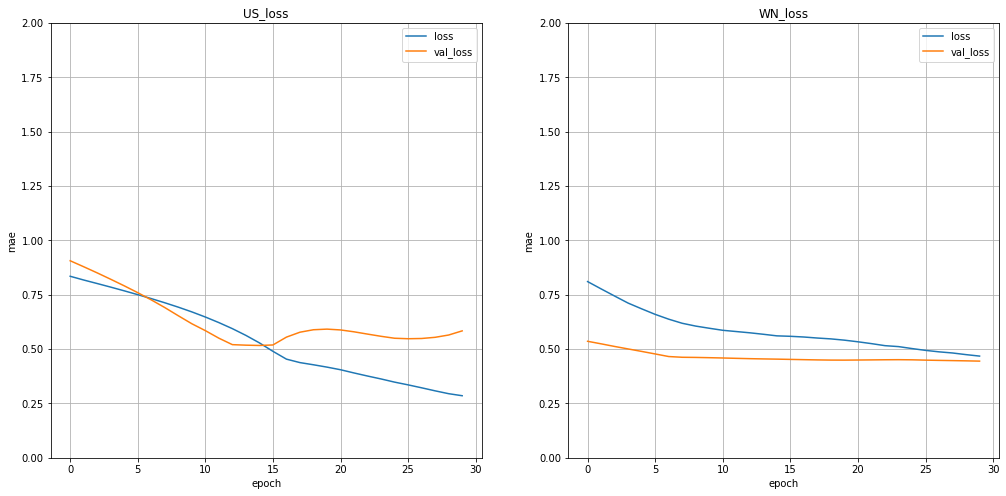

In [15]:
#show learning curves
#mean training loss measured over each epoch
#mean validation loss measured at the end of each epoch
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(17,8))
US_plot = pd.DataFrame(US_history.history) #selecting columns
WN_plot = pd.DataFrame(WN_history.history)
US_plot.plot(ax=axes[0],ylim=(0,2),title="US_loss",xlabel='epoch',ylabel='mae').grid(True)
WN_plot.plot(ax=axes[1],ylim=(0,2),title="WN_loss",xlabel='epoch',ylabel='mae').grid(True)
plt.savefig("plots/mae_12w_3ts.png")

In [35]:
#create a model with the same architecture as the original model and then set its weights

"""
# To Re-evaluate the model
loss, acc = model_new.evaluate(x_test, y_test, verbose=2)
"""
def lstm_US(test_US):
    test_US=np.reshape(test_US, (1,-1)) #reshape the data for scaling
    test_US=US_x_scaler.transform(test_US) #scale the data
    test_US = test_US.reshape((test_US.shape[0],n_timesteps,n_features_US))#reshape the data for prediction
    input_shape=(n_timesteps,test_US.shape[2])
    US_model= create_lstm_model(input_shape)
    US_model.load_weights(US_checkpoint_path) # Loads the weights
    US_yhat=US_model.predict(test_US)
    US_yhat=np.reshape(US_yhat, (1,-1))
    inv_US_yhat=US_y_scaler.inverse_transform(US_yhat)
    inv_US_yhat=inv_US_yhat[0][0]
    return inv_US_yhat

def lstm_WN(test_WN):
    test_WN=np.reshape(test_WN, (1,-1))
    test_WN=WN_x_scaler.transform(test_WN)
    test_WN = test_WN.reshape((test_WN.shape[0],n_timesteps,n_features_WN))
    input_shape=(n_timesteps,test_WN.shape[2])
    WN_model= create_lstm_model(input_shape)
    WN_model.load_weights(WN_checkpoint_path) # Loads the weights
    WN_yhat=WN_model.predict(test_WN)
    WN_yhat=np.reshape(WN_yhat, (1,-1))
    inv_WN_yhat=WN_y_scaler.inverse_transform(WN_yhat)
    inv_WN_yhat=inv_WN_yhat[0][0]
    return inv_WN_yhat

#test model prediction
US_test=(5.0,8.0,3.0,2.0,100,3.5,6.5,7.5,8.5,85,3.5,7.5,8.0,3.0,89.0)
WN_test=(5.0,8.0,3.0,100,3.5,6.5,7.5,85,3.5,7.5,8.0,89.0)
US_yhat=lstm_US(US_test)
WN_yhat=lstm_WN(WN_test)
print(US_yhat)
print(WN_yhat)
error=mean_absolute_error([[75.08757]],[[US_yhat]])
print(error)

/Users/manjuvallayil/miniforge3/envs/tinnitus/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
2022-05-14 16:06:23.158676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
/Users/manjuvallayil/miniforge3/envs/tinnitus/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


75.08757
59.202137
1.9042968801841198e-07


2022-05-14 16:06:23.297748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [46]:
def prediction(data):
    df=pd.DataFrame(data=data,columns=['c_3','sl_1','sl_2','a_2','r_1','q_1','e_1','tfi'])
    df=df.fillna(0.0)
    #append test inputs to df and save to csv df.loc[df_length] = to_append
    new_test_data=df.values.flatten()
    new_test_data=new_test_data.astype(float)
    x_test_new_df.loc[len(x_test_new_df)]=new_test_data
    x_test_new_df.to_csv('new_test_data_12w_3ts.csv',index=False)
    
    #separate US and WN features
    df_US=df[['c_3','sl_1','a_2','q_1','tfi']]
    df_WN=df[['sl_2','r_1','e_1','tfi']]
    test_US=df_US.values.flatten()
    test_US=test_US.astype(float)
    test_WN=df_WN.values.flatten()
    test_WN=test_WN.astype(float)
    #make predictions
    US_yhat=lstm_US(test_US) # predict using the lstm model 
    WN_yhat=lstm_WN(test_WN) # predict using the lstm model
    output_1="For US therapy, the predicted tfi is: {:.2f}".format(US_yhat)                         
    output_2="For WN therapy, the predicted tfi is: {:.2f}".format(WN_yhat)
    loss_plot_path='plots/mae_12w_3ts.png'
    return output_1, output_2,loss_plot_path,pd.read_csv('new_test_data_12w_3ts.csv')
    
import gradio as gr   # pip install gradio
iface = gr.Interface(
    prediction,
    #gr.inputs.Timeseries(x="time", y=["retail", "food", "other"]),
    inputs=gr.inputs.Dataframe(
        headers=('c_3','sl_1','sl_2','a_2','r_1','q_1','e_1','tfi'),
        row_count=3,
        datatype="number",
        type="pandas",
        default=None,
        label='Enter the values and click Submit for TFI prediction'
    ),
    outputs=[gr.outputs.Textbox(label="US_therapy",type="auto"),gr.outputs.Textbox(label="WN_therapy",type="auto"),gr.outputs.Image(type="file", label="US and WN Models Training Loss Curves"),gr.outputs.Dataframe(label="Appending New test_data to a file")],
    allow_flagging="never",title="Post intervention TFI Prediction",description="Please Enter Source, Pre/Week_4(0) and Mid/Week_10(6) values in the rows respectively"
)

iface.launch(share='TRUE')

Running on local URL:  http://127.0.0.1:7886/
Running on public URL: https://16084.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x2b7f1aeb0>,
 'http://127.0.0.1:7886/',
 'https://16084.gradio.app')

/Users/manjuvallayil/miniforge3/envs/tinnitus/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
2022-05-14 16:45:52.683730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
/Users/manjuvallayil/miniforge3/envs/tinnitus/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
2022-05-14 16:45:52.826331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
